In [2]:
import numpy as np
import pandas as pd
# Import matplotlib to visualize the model
import matplotlib.pyplot as plt
# Seaborn is a Python data visualization library based on matplotlib
import seaborn as sns
# %matplotlib inline sets the backend of matplotlib to the `inline` backend
%matplotlib inline

import tensorflow as tf


from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

print("TensorFlow version: ",tf.version.VERSION)

TensorFlow version:  2.5.0


In [37]:
df = pd.read_csv('/content/loan_data.csv')

In [38]:

train, test = train_test_split(df, test_size=0.01)

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9482 entries, 522 to 8271
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9482 non-null   int64  
 1   purpose            9482 non-null   object 
 2   int.rate           9482 non-null   float64
 3   installment        9482 non-null   float64
 4   log.annual.inc     9482 non-null   float64
 5   dti                9482 non-null   float64
 6   fico               9482 non-null   int64  
 7   days.with.cr.line  9482 non-null   float64
 8   revol.bal          9482 non-null   int64  
 9   revol.util         9482 non-null   float64
 10  inq.last.6mths     9482 non-null   int64  
 11  delinq.2yrs        9482 non-null   int64  
 12  pub.rec            9482 non-null   int64  
 13  not.fully.paid     9482 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.1+ MB


In [65]:
train.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [54]:
train['days.with.cr.line'].describe()


count     9482.000000
mean      4565.025236
std       2498.780352
min        178.958333
25%       2820.000000
50%       4139.958333
75%       5730.041667
max      17639.958330
Name: days.with.cr.line, dtype: float64

In [63]:
train['purpose'].unique()

array(['debt_consolidation', 'home_improvement', 'all_other',
       'small_business', 'credit_card', 'major_purchase', 'educational'],
      dtype=object)

In [64]:
purpose = tf.feature_column.categorical_column_with_vocabulary_list(
      'purpose', ['debt_consolidation', 'home_improvement', 'all_other',
       'small_business', 'credit_card', 'major_purchase', 'educational'])

# Create an indicator column out of the created categorical column.
purpose_one_hot = tf.feature_column.indicator_column(purpose)
demo(purpose_one_hot)

[[1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]


In [40]:
batch_size = 5

In [41]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('not.fully.paid')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels)) # TODO 2a
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [42]:
# TODO 2b
train_ds = df_to_dataset(train, batch_size=batch_size)

In [71]:
test_ds = df_to_dataset(test, batch_size=batch_size)

In [44]:
# If you don't use take(1), all elements will eventually be fetched
for feature_batch, label_batch in train_ds.take(1):
  print('Every feature:', list(feature_batch.keys()))
  
  print('A batch of targets:', label_batch)

Every feature: ['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']
A batch of targets: tf.Tensor([0 0 0 0 0], shape=(5,), dtype=int64)


In [45]:
example_batch = next(iter(train_ds))[0]

In [46]:
def demo(feature_column):
  feature_layer = layers.DenseFeatures(feature_column)
  print(feature_layer(example_batch).numpy())

In [48]:
credit_policy = feature_column.numeric_column("credit.policy")
tf.feature_column.numeric_column
print(credit_policy)

NumericColumn(key='credit.policy', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)


In [50]:
demo(credit_policy)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9482 entries, 522 to 8271
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9482 non-null   int64  
 1   purpose            9482 non-null   object 
 2   int.rate           9482 non-null   float64
 3   installment        9482 non-null   float64
 4   log.annual.inc     9482 non-null   float64
 5   dti                9482 non-null   float64
 6   fico               9482 non-null   int64  
 7   days.with.cr.line  9482 non-null   float64
 8   revol.bal          9482 non-null   int64  
 9   revol.util         9482 non-null   float64
 10  inq.last.6mths     9482 non-null   int64  
 11  delinq.2yrs        9482 non-null   int64  
 12  pub.rec            9482 non-null   int64  
 13  not.fully.paid     9482 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.1+ MB


In [60]:
days_with_cr_line = feature_column.numeric_column("days.with.cr.line")
tf.feature_column.numeric_column
print(days_with_cr_line)

NumericColumn(key='days.with.cr.line', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)


In [61]:
days_with_cr_line_buckets = tf.feature_column.bucketized_column(days_with_cr_line, boundaries=[5000,10000,15000,20000])
demo(days_with_cr_line_buckets) # TODO 3a


[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [68]:
feature_columns = []
feature_columns.append(days_with_cr_line_buckets)
feature_columns.append(purpose_one_hot)
for header in ['credit.policy', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec']:
  feature_columns.append(feature_column.numeric_column(header))

In [69]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)


In [74]:
# `Sequential` provides training and inference features on this model.
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1)
])

# `Compile` configures the model for training.
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

# `Fit` trains the model for a fixed number of epochs
history = model.fit(train_ds,
          validation_data=test_ds,
          epochs=10)

Epoch 1/10
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
1884/1897 [============================>.] - ETA: 0s - loss: 97.5373 - accuracy: 0.7283WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'credit.policy': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=int64>, 'purpose': <tf.Tensor 'ExpandDims_10:0' shape=(None, 1) dtype=string>, 'int.rate': <tf.Tensor 'ExpandDims_7:0' shape=(None, 1) dtype=float64>, 'installment': <tf.Tensor 'ExpandDims_6:0' shape=(None, 1) dtype=float64>, 'log.annual.inc': <tf.Tensor 'ExpandDims_8:0' shape=(None, 1) dtype=float64>, 'dti': <tf.Tensor 'ExpandDims_3:0' shape=(None, 1) dtype=float64>, 'fico': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=int64>, 'days.with.cr.line': <tf.Tensor 'ExpandDims_1:0' shape=(None, 1) dtype=float64>, 'revol.bal': <tf.Tensor 'ExpandDims_11:0' shape=(None, 1) dtype=int64>, 'revol.ut

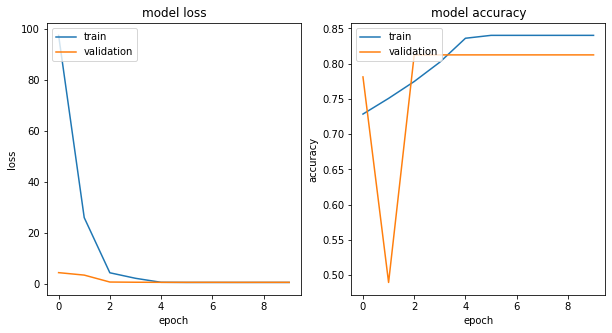

In [75]:
def plot_curves(history, metrics):
    nrows = 1
    ncols = 2
    fig = plt.figure(figsize=(10, 5))

    for idx, key in enumerate(metrics):  
        ax = fig.add_subplot(nrows, ncols, idx+1)
        plt.plot(history.history[key])
        plt.plot(history.history['val_{}'.format(key)])
        plt.title('model {}'.format(key))
        plt.ylabel(key)
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper left');    
    
    

plot_curves(history, ['loss', 'accuracy'])